In [ ]:
# سوال 1.1 ریاضایت : بررسی معادله صفحه جداکننده پیشنهاد شده توسط ساپورت وکتور ماشین
# Install cvxopt if not already installed
!pip install cvxopt

import numpy as np
from cvxopt import matrix, solvers

# Input data
X = np.array([
    [1, -1, 1],
    [-3, 1, 1],
    [-3, 1, -1],
    [1, 2, 1],
    [-1, -1, 2]
], dtype='float64')

y = np.array([-1, 1, -1, -1, 1], dtype='float64')

N = X.shape[0]

# Compute the Gram matrix for linear kernel
K = np.dot(X, X.T)

# Construct the components of the QP problem
P = matrix(np.outer(y, y) * K)
q = matrix(-np.ones(N))
G = matrix(-np.eye(N))          # alpha_i >= 0 --> -alpha_i <= 0
h = matrix(np.zeros(N))
A = matrix(y, (1, N))
b = matrix(0.0)

# Solve QP problem
sol = solvers.qp(P, q, G, h, A, b)

# Extract solution
alphas = np.ravel(sol['x'])

# Support vectors have alpha > 1e-5
sv = alphas > 1e-5
ind = np.arange(len(alphas))[sv]
alpha_sv = alphas[sv]
X_sv = X[sv]
y_sv = y[sv]

print("Alphas:", alphas)
print("Support Vectors:", X_sv)

# Compute weight vector w
w = np.sum((alpha_sv * y_sv)[:, None] * X_sv, axis=0)
print("Weight vector w:", w)

# Compute bias term b using any support vector
b = y_sv[0] - np.dot(w, X_sv[0])
print("Bias b:", b)

# Final decision function: f(x) = w · x + b
w1, w2, w3 = w
print(f"Final decision function: f(x) = ({w1:.4f})*x1 + ({w2:.4f})*x2 + ({w3:.4f})*x3 + ({b:.4f})")

     pcost       dcost       gap    pres   dres
 0: -5.8671e-01 -1.5647e+00  1e+00  1e-16  1e+00
 1: -6.1811e-01 -6.5236e-01  3e-02  2e-16  1e-01
 2: -6.2499e-01 -6.2638e-01  1e-03  1e-16  2e-16
 3: -6.2500e-01 -6.2501e-01  1e-05  6e-17  4e-16
 4: -6.2500e-01 -6.2500e-01  1e-07  7e-17  2e-16
Optimal solution found.
Alphas: [0.22093932 0.40987279 0.39243638 0.01162436 0.21512728]
Support Vectors: [[ 1. -1.  1.]
 [-3.  1.  1.]
 [-3.  1. -1.]
 [ 1.  2.  1.]
 [-1. -1.  2.]]
Weight vector w: [-5.00000183e-01 -2.77304760e-07  1.00000005e+00]
Bias b: -1.5000001451862675
Final decision function: f(x) = (-0.5000)*x1 + (-0.0000)*x2 + (1.0000)*x3 + (-1.5000)


In [ ]:
#خواندن دیتاست و تحلیل اولیه
# Step 1: Install gdown if it's not already installed
!pip install -q gdown

# Step 2: Download the file using its Google Drive ID
file_id = '1-5LJq2Gcr-ztqbNTYkLXj8pPQuRlAfu8'
output = 'PRSA_data_2010.1.1-2014.12.31.csv'
!gdown --id {file_id} -O {output}

# Step 3: Load the CSV into a pandas DataFrame
import pandas as pd

df = pd.read_csv(output)

# Step 4: Display basic info
print("✅ Dataset Loaded Successfully!")
print(df.head())
print(df.info())


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-5LJq2Gcr-ztqbNTYkLXj8pPQuRlAfu8
To: /content/PRSA_data_2010.1.1-2014.12.31.csv
100% 2.01M/2.01M [00:00<00:00, 49.4MB/s]
✅ Dataset Loaded Successfully!
   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 # 

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


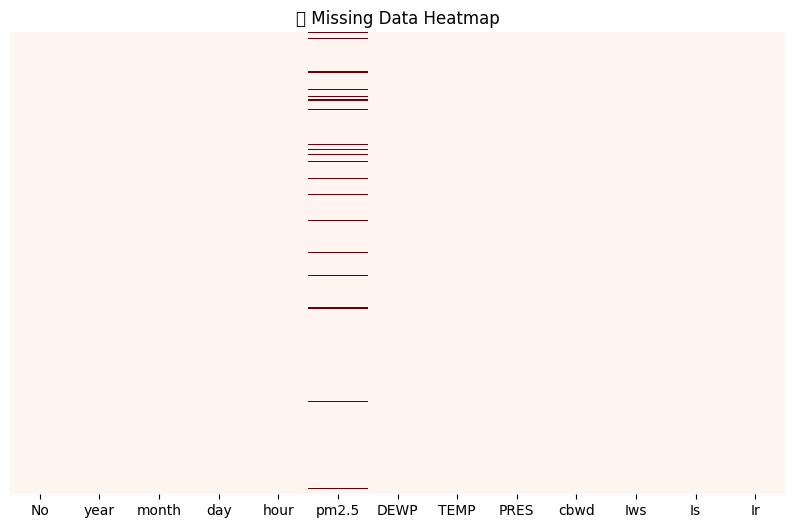

Missing values per column:
 pm2.5    2067
dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Missing values per column
missing_counts = df.isnull().sum()

# Visualize missingness
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="Reds")
plt.title("🔍 Missing Data Heatmap")
plt.show()

# Print missing values summary
print("Missing values per column:\n", missing_counts[missing_counts > 0])


In [ ]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


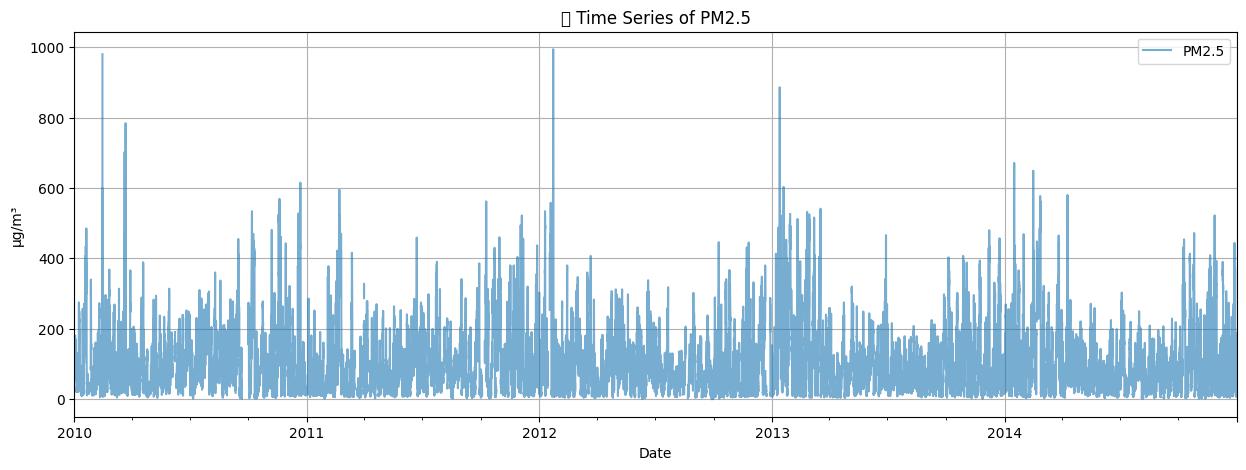

In [ ]:
plt.figure(figsize=(15, 5))
df['pm2.5'].plot(alpha=0.6, label='PM2.5')
plt.title("🕒 Time Series of PM2.5")
plt.xlabel("Date")
plt.ylabel("µg/m³")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


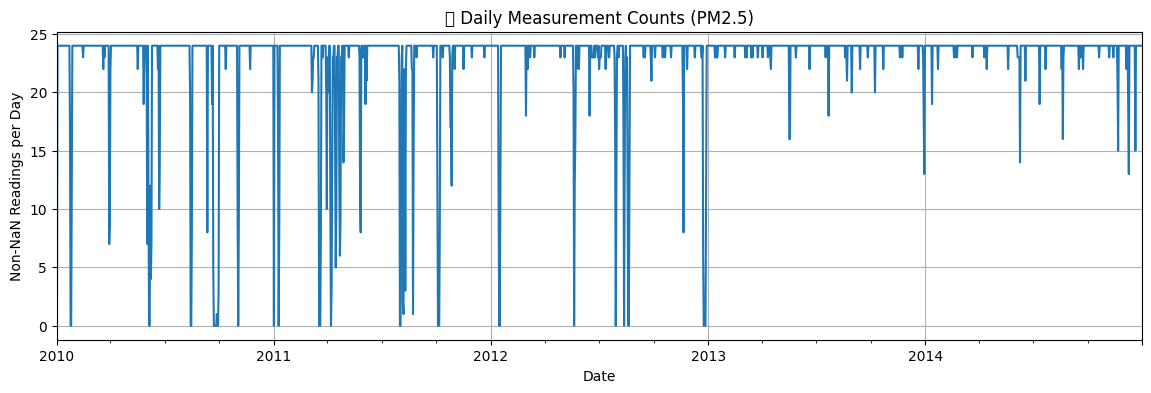

In [ ]:
daily_counts = df['pm2.5'].resample('D').count()

plt.figure(figsize=(14, 4))
daily_counts.plot()
plt.title("📊 Daily Measurement Counts (PM2.5)")
plt.ylabel("Non-NaN Readings per Day")
plt.xlabel("Date")
plt.grid(True)
plt.show()


In [ ]:
#پیش پردازش و تمیز کردن داده ها
# بررسی مقادیر گمشده
# Total and percentage of missing values
df = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')
missing_count = df.isnull().sum()
missing_percent = (df.isnull().mean() * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percent': missing_percent
}).sort_values(by='Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])


       Missing Count  Missing Percent
pm2.5           2067             4.72


In [ ]:
# ✅ Create a datetime column from year, month, day, hour
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# ✅ Set datetime as index (required for time-based interpolation)
df.set_index('datetime', inplace=True)

# ✅ Interpolate missing pm2.5 values based on time and fill edge NaNs
df['pm2.5_interpolated'] = df['pm2.5'].interpolate(method='time').bfill()

# ✅ Check results
print("Before interpolation:", df['pm2.5'].isnull().sum())
print("After interpolation:", df['pm2.5_interpolated'].isnull().sum())


Before interpolation: 2067
After interpolation: 0


In [ ]:
#بررسی داده های  categorical

print(df['cbwd'].unique())


['NW' 'cv' 'NE' 'SE']


In [ ]:
# Manual label encoding
cbwd_map = {
    'cv': 0,
    'NW': 1,
    'NE': 2,
    'SE': 3
}

# Create a new column with numerical encoding
df['cbwd_encoded'] = df['cbwd'].map(cbwd_map)

# Preview
df[['cbwd', 'cbwd_encoded']].head(30)


,cbwd,cbwd_encoded
datetime,,
2010-01-01 00:00:00,NW,1
2010-01-01 01:00:00,NW,1
2010-01-01 02:00:00,NW,1
2010-01-01 03:00:00,NW,1
2010-01-01 04:00:00,NW,1
2010-01-01 05:00:00,NW,1
2010-01-01 06:00:00,NW,1
2010-01-01 07:00:00,NW,1
2010-01-01 08:00:00,NW,1


In [ ]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pm2.5_interpolated,cbwd_encoded
datetime,,,,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,129.0,1
2010-01-01 01:00:00,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,129.0,1
2010-01-01 02:00:00,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,129.0,1
2010-01-01 03:00:00,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,129.0,1
2010-01-01 04:00:00,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,129.0,1


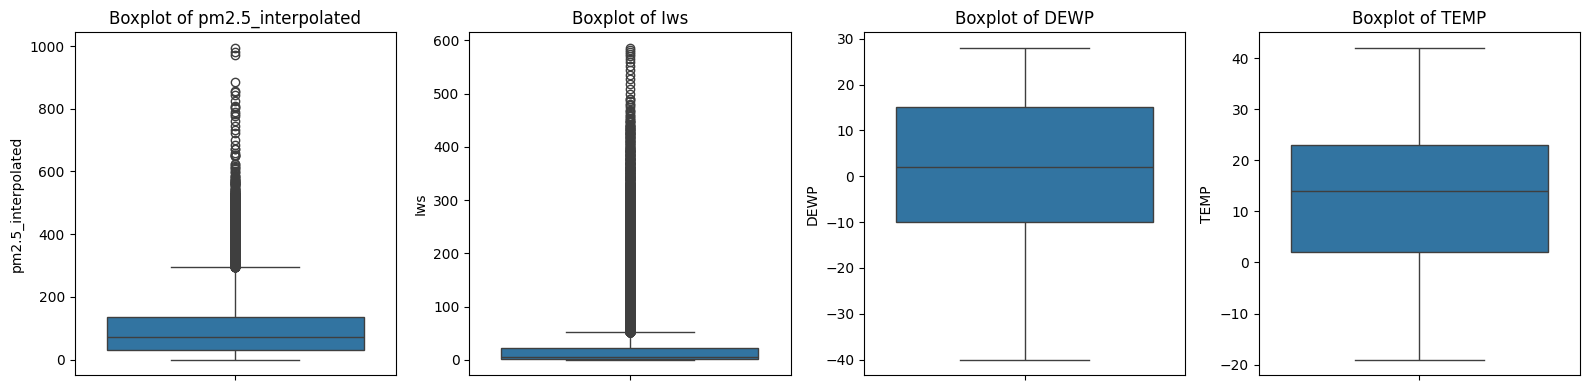

In [ ]:
#بررسی داده های پرت

import seaborn as sns
import matplotlib.pyplot as plt

# Features to check
features = ['pm2.5_interpolated', 'Iws', 'DEWP', 'TEMP']

# Boxplot to visualize outliers
plt.figure(figsize=(16, 4))
for i, col in enumerate(features):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [ ]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pm2.5_interpolated,cbwd_encoded
datetime,,,,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,129.0,1
2010-01-01 01:00:00,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,129.0,1
2010-01-01 02:00:00,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,129.0,1
2010-01-01 03:00:00,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,129.0,1
2010-01-01 04:00:00,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,129.0,1


In [ ]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        before = df.shape[0]
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        after = df.shape[0]
        print(f"{col}: Removed {before - after} outliers")
    return df


# Re-run the IQR-based filtering on cleaned data
df_cleaned = remove_outliers_iqr(df, ['pm2.5_interpolated', 'Iws', 'DEWP', 'TEMP'])

# Save back to df
df = df_cleaned.reset_index(drop=True)



pm2.5_interpolated: Removed 1884 outliers
Iws: Removed 4800 outliers
DEWP: Removed 0 outliers
TEMP: Removed 0 outliers


In [ ]:
#دسته بندی استاندارد غلظت  pm2.5
# Define function to classify PM2.5 levels
def classify_pm25(pm_value):
    if pd.isna(pm_value):
        return 'NA'
    elif pm_value <= 12.0:
        return 'good'
    elif pm_value <= 35.4:
        return 'moderate'
    elif pm_value <= 55.4:
        return 'unhealthy for sensitive groups'
    elif pm_value <= 150.4:
        return 'unhealthy'
    elif pm_value <= 250.4:
        return 'very unhealthy'
    elif pm_value <= 350.4:
        return 'hazardous'
    elif pm_value <= 500:
        return 'hazardous(higher level)'
    else:
        return 'out of the range'

# Apply classification to the interpolated PM2.5 values if available, else original
if 'pm2.5_interpolated' in df.columns:
    df['air_quality_category'] = df['pm2.5_interpolated'].apply(classify_pm25)
else:
    df['air_quality_category'] = df['pm2.5'].apply(classify_pm25)

# Show sample
df[['pm2.5_interpolated', 'air_quality_category']].head(80)


,pm2.5_interpolated,air_quality_category
0,129.0,unhealthy
1,129.0,unhealthy
2,129.0,unhealthy
3,129.0,unhealthy
4,129.0,unhealthy
...,...,...
75,66.0,unhealthy
76,50.0,unhealthy for sensitive groups
77,56.0,unhealthy
78,77.0,unhealthy


In [ ]:
#ویژگی lag
df['pm2.5_lag_2'] = df['pm2.5_interpolated'].shift(2)
df['pm2.5_lag_24'] = df['pm2.5_interpolated'].shift(24)

# View result
print(df[['pm2.5_interpolated', 'pm2.5_lag_2', 'pm2.5_lag_24']].head(30))


    pm2.5_interpolated  pm2.5_lag_2  pm2.5_lag_24
0                129.0          NaN           NaN
1                129.0          NaN           NaN
2                129.0        129.0           NaN
3                129.0        129.0           NaN
4                129.0        129.0           NaN
5                129.0        129.0           NaN
6                129.0        129.0           NaN
7                129.0        129.0           NaN
8                129.0        129.0           NaN
9                129.0        129.0           NaN
10               129.0        129.0           NaN
11               129.0        129.0           NaN
12               129.0        129.0           NaN
13               129.0        129.0           NaN
14               129.0        129.0           NaN
15               129.0        129.0           NaN
16               129.0        129.0           NaN
17               129.0        129.0           NaN
18               129.0        129.0           NaN


In [ ]:
#حل مشکل مقادیر  NaN
# Drop rows where either of the lag features have NaN values
df.dropna(subset=['pm2.5_lag_2', 'pm2.5_lag_24'], inplace=True)

# Optional: reset the index after dropping
df.reset_index(inplace=True)

# Check the first few rows to ensure the NaN values are gone
print(df[['pm2.5_interpolated', 'pm2.5_lag_2', 'pm2.5_lag_24']].head())


   pm2.5_interpolated  pm2.5_lag_2  pm2.5_lag_24
0               129.0        129.0         129.0
1               148.0        129.0         129.0
2               159.0        129.0         129.0
3               181.0        148.0         129.0
4               138.0        159.0         129.0


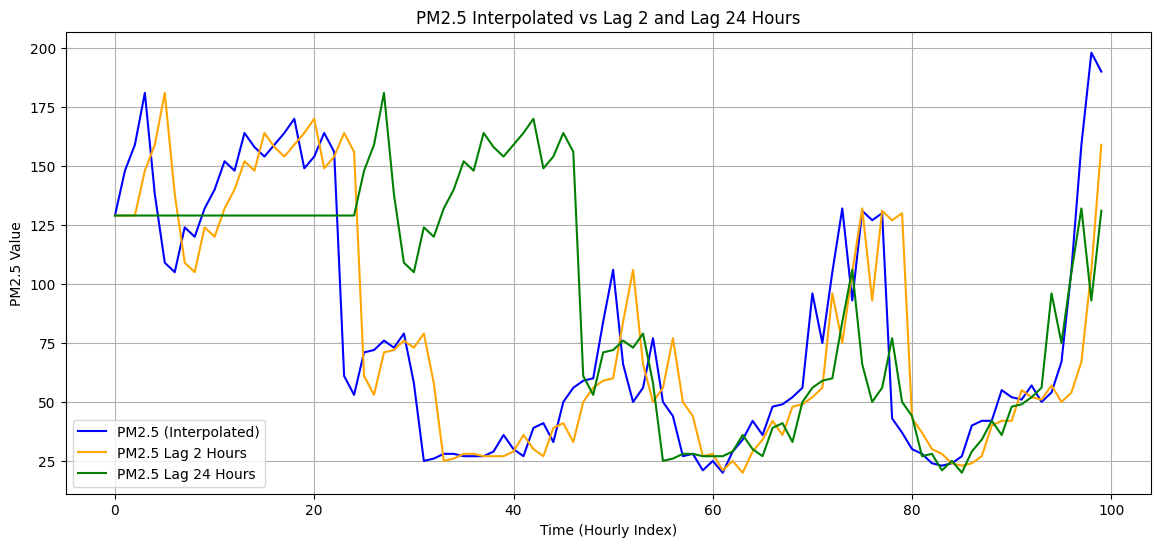

In [ ]:
#رسم نمودار مناسب برای لگ ها
import matplotlib.pyplot as plt

# ✅ Plot PM2.5 current and lag features to visually analyze patterns
plt.figure(figsize=(14, 6))

# Plot original PM2.5 interpolated values
plt.plot(df['pm2.5_interpolated'].iloc[:100], label='PM2.5 (Interpolated)', color='blue')

# Plot lag of 2 hours
plt.plot(df['pm2.5_lag_2'].iloc[:100], label='PM2.5 Lag 2 Hours', color='orange')

# Plot lag of 24 hours
plt.plot(df['pm2.5_lag_24'].iloc[:100], label='PM2.5 Lag 24 Hours', color='green')

# Add labels and legend
plt.title('PM2.5 Interpolated vs Lag 2 and Lag 24 Hours')
plt.xlabel('Time (Hourly Index)')
plt.ylabel('PM2.5 Value')
plt.legend()
plt.grid(True)
plt.show()


                    pm2.5_interpolated  pm2.5_lag_2  pm2.5_lag_24
pm2.5_interpolated            1.000000     0.888989      0.231640
pm2.5_lag_2                   0.888989     1.000000      0.265181
pm2.5_lag_24                  0.231640     0.265181      1.000000


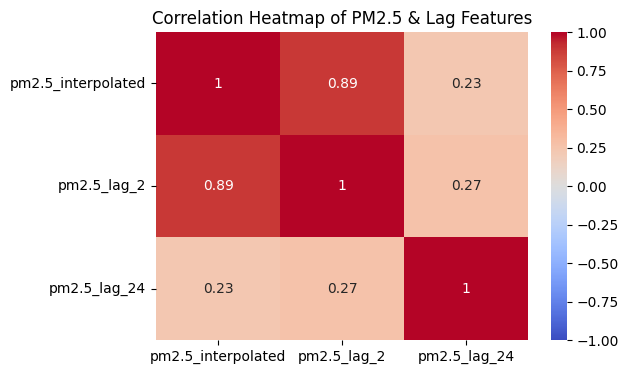

In [ ]:
#correlation  بین  pm2.5  و لگ ها

# 📊 Check correlation between PM2.5 interpolated and its lag features
corr_matrix = df[['pm2.5_interpolated', 'pm2.5_lag_2', 'pm2.5_lag_24']].corr()

# ✅ Show correlation values
print(corr_matrix)

# 📈 Plot heatmap to visualize correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of PM2.5 & Lag Features')
plt.show()


In [ ]:
#ویژگی rolling statistics
# ✅ Calculate rolling statistics over a 24-hour window for pm2.5_interpolated

# Rolling mean (24-hour)
df['pm2.5_roll_mean_24h'] = df['pm2.5_interpolated'].rolling(window=24).mean()

# Rolling standard deviation (24-hour)
df['pm2.5_roll_std_24h'] = df['pm2.5_interpolated'].rolling(window=24).std()

# Rolling variance (24-hour)
df['pm2.5_roll_var_24h'] = df['pm2.5_interpolated'].rolling(window=24).var()


# ✅ View the first few rows of these new columns
df[['pm2.5_interpolated',
    'pm2.5_roll_mean_24h',
    'pm2.5_roll_std_24h',
    'pm2.5_roll_var_24h']].head(30)


,pm2.5_interpolated,pm2.5_roll_mean_24h,pm2.5_roll_std_24h,pm2.5_roll_var_24h
0,129.0,NaN,NaN,NaN
1,148.0,NaN,NaN,NaN
2,159.0,NaN,NaN,NaN
3,181.0,NaN,NaN,NaN
4,138.0,NaN,NaN,NaN
5,109.0,NaN,NaN,NaN
6,105.0,NaN,NaN,NaN
7,124.0,NaN,NaN,NaN
8,120.0,NaN,NaN,NaN
9,132.0,NaN,NaN,NaN


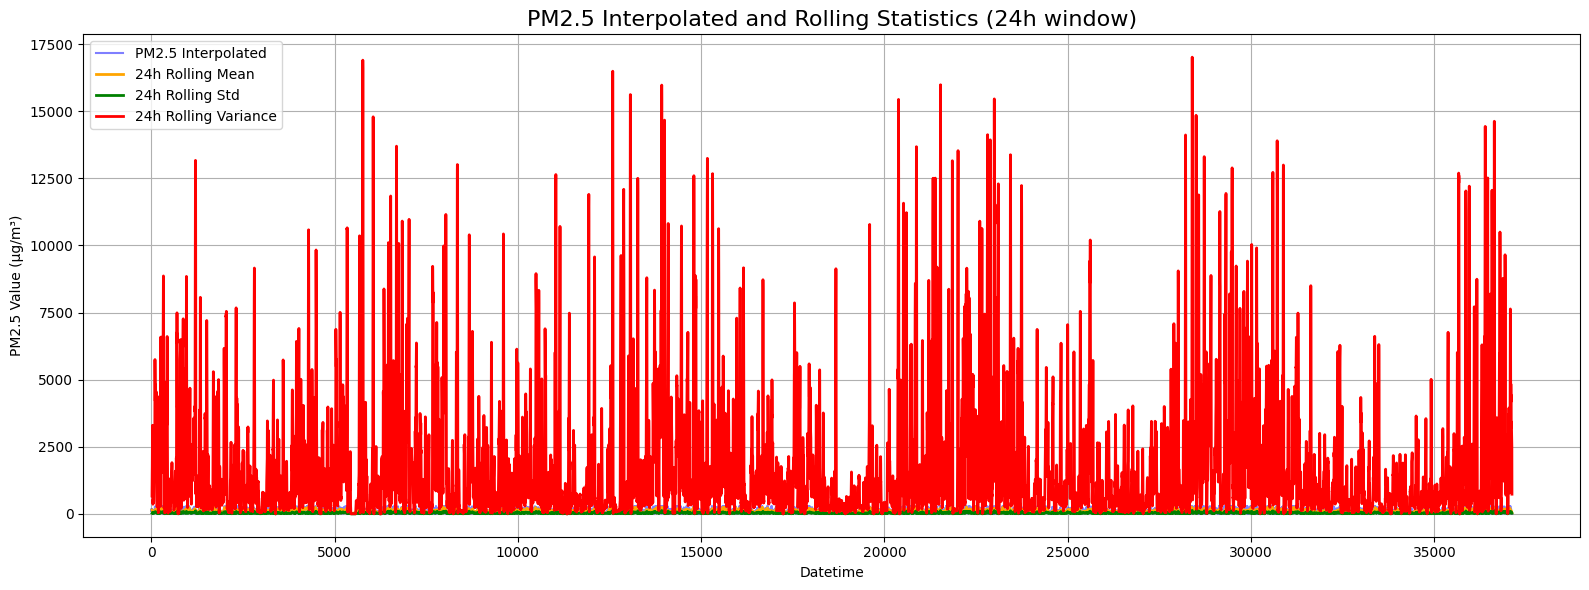

In [ ]:
# 📌 Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# 📌 Calculate rolling statistics (24-hour window)
df['pm2.5_roll_mean_24h'] = df['pm2.5_interpolated'].rolling(window=24).mean()
df['pm2.5_roll_std_24h']  = df['pm2.5_interpolated'].rolling(window=24).std()
df['pm2.5_roll_var_24h']  = df['pm2.5_interpolated'].rolling(window=24).var()

# 📌 Plot interpolated PM2.5 values and rolling statistics
plt.figure(figsize=(16, 6))

# Plot interpolated PM2.5 values
plt.plot(df.index, df['pm2.5_interpolated'], label='PM2.5 Interpolated', color='blue', alpha=0.5)

# Plot rolling mean
plt.plot(df.index, df['pm2.5_roll_mean_24h'], label='24h Rolling Mean', color='orange', linewidth=2)

# Plot rolling standard deviation
plt.plot(df.index, df['pm2.5_roll_std_24h'], label='24h Rolling Std', color='green', linewidth=2)

# Plot rolling variance
plt.plot(df.index, df['pm2.5_roll_var_24h'], label='24h Rolling Variance', color='red', linewidth=2)

# 📌 Customize the plot
plt.title('PM2.5 Interpolated and Rolling Statistics (24h window)', fontsize=16)
plt.xlabel('Datetime')
plt.ylabel('PM2.5 Value (μg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# 📌 Show the plot
plt.show()


In [ ]:
#انکود کرد ویژگی های تناوبی
# ✅ Encode periodic features using sine and cosine transformations

import numpy as np
import pandas as pd

# If not already done, create a datetime column and set it as index
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)

# Extract periodic time-based features
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek  # Monday = 0, Sunday = 6
df['month'] = df.index.month

# Encode hour of day using sine and cosine
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

# Encode day of week using sine and cosine
df['dayofweek_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['dayofweek_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

# Encode month using sine and cosine
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# ✅ Display the first few rows to verify
df[['hour', 'hour_sin', 'hour_cos',
    'day_of_week', 'dayofweek_sin', 'dayofweek_cos',
    'month', 'month_sin', 'month_cos']].head(24)


,hour,hour_sin,hour_cos,day_of_week,dayofweek_sin,dayofweek_cos,month,month_sin,month_cos
datetime,,,,,,,,,
2010-01-02 00:00:00,0,0.000000e+00,1.000000e+00,5,-0.974928,-0.222521,1,0.5,0.866025
2010-01-02 01:00:00,1,2.588190e-01,9.659258e-01,5,-0.974928,-0.222521,1,0.5,0.866025
2010-01-02 02:00:00,2,5.000000e-01,8.660254e-01,5,-0.974928,-0.222521,1,0.5,0.866025
2010-01-02 03:00:00,3,7.071068e-01,7.071068e-01,5,-0.974928,-0.222521,1,0.5,0.866025
2010-01-02 04:00:00,4,8.660254e-01,5.000000e-01,5,-0.974928,-0.222521,1,0.5,0.866025
2010-01-02 05:00:00,5,9.659258e-01,2.588190e-01,5,-0.974928,-0.222521,1,0.5,0.866025
2010-01-02 06:00:00,6,1.000000e+00,6.123234e-17,5,-0.974928,-0.222521,1,0.5,0.866025
2010-01-02 07:00:00,7,9.659258e-01,-2.588190e-01,5,-0.974928,-0.222521,1,0.5,0.866025
2010-01-02 08:00:00,8,8.660254e-01,-5.000000e-01,5,-0.974928,-0.222521,1,0.5,0.866025


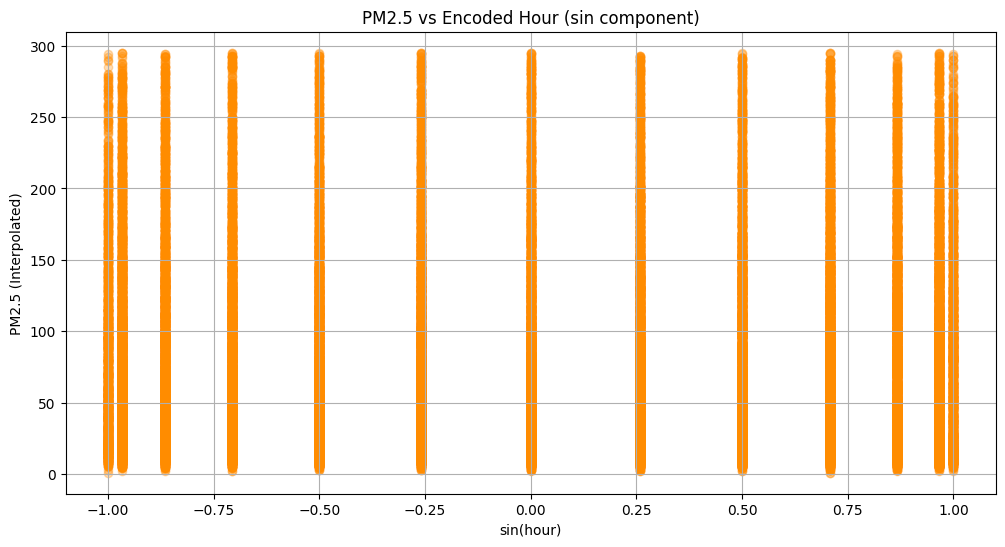

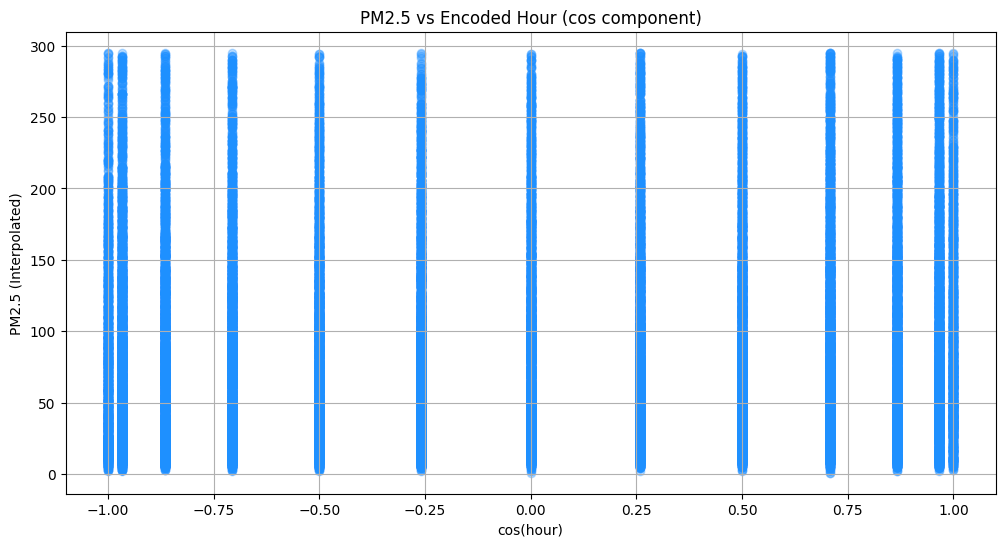

In [ ]:
# 📌 Scatter plot of the encoded hour feature vs PM2.5 values

import matplotlib.pyplot as plt

# Scatter plot of the sine component of the hour
plt.figure(figsize=(12, 6))
plt.scatter(df['hour_sin'], df['pm2.5_interpolated'], alpha=0.3, color='darkorange')
plt.title('PM2.5 vs Encoded Hour (sin component)')
plt.xlabel('sin(hour)')
plt.ylabel('PM2.5 (Interpolated)')
plt.grid(True)
plt.show()

# Scatter plot of the cosine component of the hour
plt.figure(figsize=(12, 6))
plt.scatter(df['hour_cos'], df['pm2.5_interpolated'], alpha=0.3, color='dodgerblue')
plt.title('PM2.5 vs Encoded Hour (cos component)')
plt.xlabel('cos(hour)')
plt.ylabel('PM2.5 (Interpolated)')
plt.grid(True)
plt.show()


In [ ]:
# ✅ Create a new column 'season' based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month'].apply(get_season)

# ✅ Group by season and calculate mean PM2.5 levels
seasonal_pm25 = df.groupby('season')['pm2.5_interpolated'].mean().sort_values(ascending=False)

# ✅ Display results
print("Average PM2.5 by season:")
print(seasonal_pm25)


Average PM2.5 by season:
season
Winter    96.526739
Autumn    93.290312
Spring    89.546392
Summer    88.551912
Name: pm2.5_interpolated, dtype: float64


In [ ]:
df.head()

,index,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,...,pm2.5_roll_std_24h,pm2.5_roll_var_24h,day_of_week,hour_sin,hour_cos,dayofweek_sin,dayofweek_cos,month_sin,month_cos,season
datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-02 00:00:00,24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,...,NaN,NaN,5,0.000000,1.000000,-0.974928,-0.222521,0.5,0.866025,Winter
2010-01-02 01:00:00,25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,...,NaN,NaN,5,0.258819,0.965926,-0.974928,-0.222521,0.5,0.866025,Winter
2010-01-02 02:00:00,26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,...,NaN,NaN,5,0.500000,0.866025,-0.974928,-0.222521,0.5,0.866025,Winter
2010-01-02 03:00:00,27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,...,NaN,NaN,5,0.707107,0.707107,-0.974928,-0.222521,0.5,0.866025,Winter
2010-01-02 04:00:00,28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,...,NaN,NaN,5,0.866025,0.500000,-0.974928,-0.222521,0.5,0.866025,Winter


In [ ]:
# Extract day of the week (0 = Monday, 6 = Sunday)
df['day_of_week'] = df.index.dayofweek

# If you want readable names (optional)
df['day_name'] = df.index.day_name()

# Group by day of the week and calculate average PM2.5
weekly_avg = df.groupby('day_name')['pm2.5_interpolated'].mean().sort_values(ascending=False)
print(weekly_avg)


day_name
Friday       94.797493
Saturday     94.585540
Thursday     91.700132
Tuesday      91.561082
Wednesday    90.249126
Sunday       89.896166
Monday       89.050747
Name: pm2.5_interpolated, dtype: float64


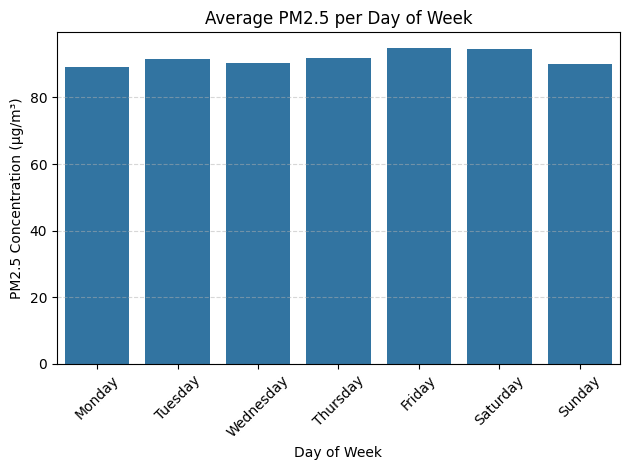

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reorder the days to start from Monday
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x=weekly_avg.loc[ordered_days].index, y=weekly_avg.loc[ordered_days].values)
plt.title("Average PM2.5 per Day of Week")
plt.ylabel("PM2.5 Concentration (μg/m³)")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


                    pm2.5_interpolated      PRES      TEMP       Iws
pm2.5_interpolated            1.000000 -0.066859 -0.063897 -0.165288
PRES                         -0.066859  1.000000 -0.822570 -0.028232
TEMP                         -0.063897 -0.822570  1.000000  0.068367
Iws                          -0.165288 -0.028232  0.068367  1.000000


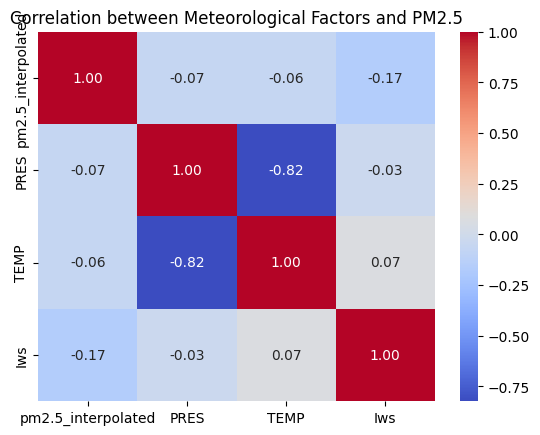

In [ ]:
# Select relevant columns
features = df[['pm2.5_interpolated', 'PRES', 'TEMP', 'Iws']]

# Compute the correlation matrix
correlation_matrix = features.corr()

# Display the matrix
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Meteorological Factors and PM2.5")
plt.show()


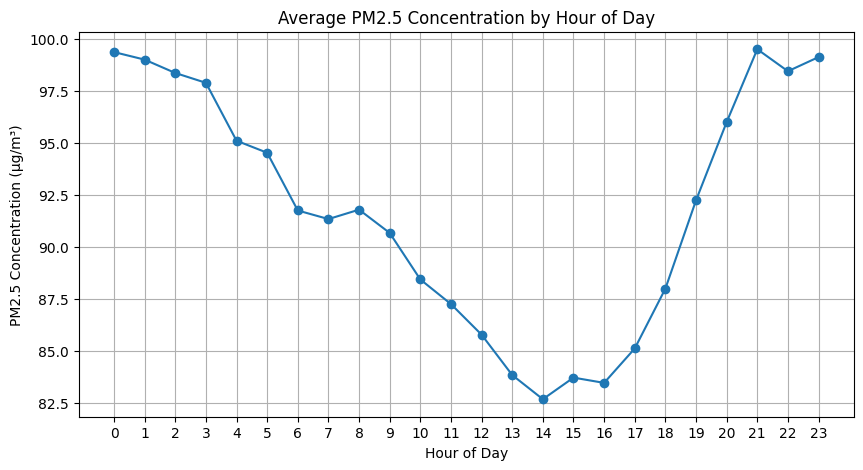

In [ ]:
# Group by hour and calculate average PM2.5 for each hour
hourly_avg = df.groupby('hour')['pm2.5_interpolated'].mean()

import matplotlib.pyplot as plt

# Plot the hourly average PM2.5
plt.figure(figsize=(10, 5))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o')
plt.title('Average PM2.5 Concentration by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('PM2.5 Concentration (μg/m³)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()


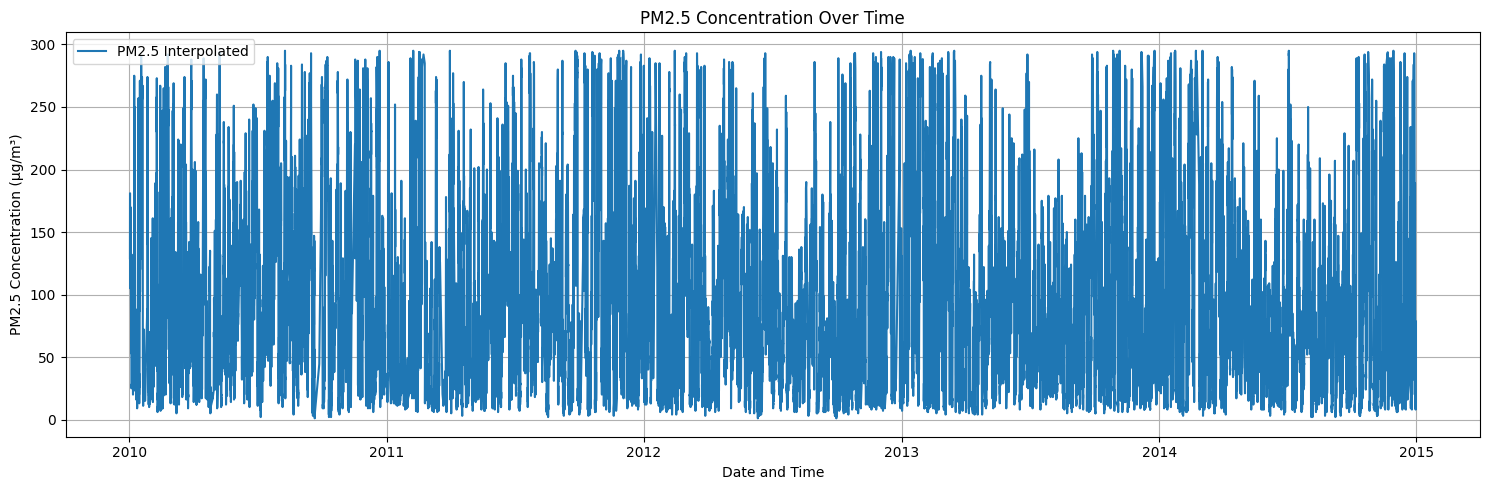

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Step 1: Combine year, month, day, hour into a datetime column
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# ✅ Step 2: Set datetime as index (for easier plotting and time operations)
df.set_index('datetime', inplace=True)

# ✅ Step 3: Plot PM2.5 interpolated values over time
plt.figure(figsize=(15, 5))
plt.plot(df['pm2.5_interpolated'], label='PM2.5 Interpolated')
plt.title('PM2.5 Concentration Over Time')
plt.xlabel('Date and Time')
plt.ylabel('PM2.5 Concentration (μg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 📅 Find the datetime with the highest PM2.5 value
max_pollution = df['pm2.5_interpolated'].idxmax()
max_value = df['pm2.5_interpolated'].max()

# 🖨️ Print the result
print(f"The highest PM2.5 value was {max_value} µg/m³ on {max_pollution}")


The highest PM2.5 value was 295.0 µg/m³ on 2010-08-09 23:00:00


In [ ]:
# Group by month and calculate the mean of PM2.5 interpolated
monthly_avg = df.groupby('month')['pm2.5_interpolated'].mean()

# Print values for January (1) and December (12)
print("Average PM2.5 in January:", monthly_avg[1])
print("Average PM2.5 in December:", monthly_avg[12])


Average PM2.5 in January: 91.61490514404636
Average PM2.5 in December: 98.65932033866765


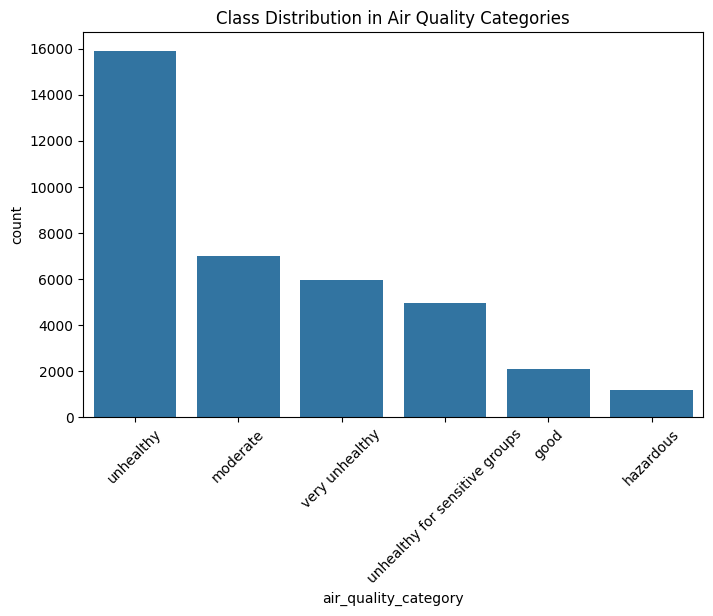

Category distribution:
 air_quality_category
unhealthy                         15919
moderate                           6990
very unhealthy                     5957
unhealthy for sensitive groups     4950
good                               2108
hazardous                          1192
Name: count, dtype: int64
Balanced distribution (downsampling):
air_quality_category
good                              1192
moderate                          1192
unhealthy for sensitive groups    1192
unhealthy                         1192
very unhealthy                    1192
hazardous                         1192
Name: count, dtype: int64
                               air_quality_category  air_quality_encoded
datetime                                                                
2013-10-29 15:00:00                            good                    0
2013-08-30 20:00:00                        moderate                    1
2010-03-28 18:00:00  unhealthy for sensitive groups                    2
2011-

In [ ]:
# ✅ Step 1: Check class distribution in air quality categories
import matplotlib.pyplot as plt
import seaborn as sns

# Plot value counts
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='air_quality_category', order=df['air_quality_category'].value_counts().index)
plt.title("Class Distribution in Air Quality Categories")
plt.xticks(rotation=45)
plt.show()

# ✅ Step 2: Check imbalance
category_counts = df['air_quality_category'].value_counts()
print("Category distribution:\n", category_counts)

# ✅ Step 3: Drop rows with missing labels
df_down = df.dropna(subset=['air_quality_category'])

# ✅ Step 4: Apply custom encoding
category_order = {
    'good': 0,
    'moderate': 1,
    'unhealthy for sensitive groups': 2,
    'unhealthy': 3,
    'very unhealthy': 4,
    'hazardous': 5
}
df_down = df_down[df_down['air_quality_category'].isin(category_order)]
df_down['air_quality_encoded'] = df_down['air_quality_category'].map(category_order)

# ✅ Step 5: Select features
features = ['pm2.5_interpolated', 'DEWP', 'TEMP', 'Iws']
df_down = df_down[features + ['air_quality_encoded', 'air_quality_category']]

# ✅ Step 6: Downsample each class to match the minority class
from sklearn.utils import resample
min_class_size = df_down['air_quality_encoded'].value_counts().min()

df_balanced = pd.concat([
    resample(group,
             replace=False,
             n_samples=min_class_size,
             random_state=42)
    for _, group in df_down.groupby('air_quality_encoded')
])

# ✅ Step 7: Check new distribution
print("Balanced distribution (downsampling):")
print(df_balanced['air_quality_category'].value_counts())

# ✅ Optional: Save to file
# df_balanced.to_csv("downsampled_dataset.csv", index=False)

# ✅ Show the final balanced dataset
print(df_balanced[['air_quality_category', 'air_quality_encoded']].drop_duplicates().sort_values(by='air_quality_encoded'))

print(df_balanced)

In [ ]:
# Print unique categories from 'air_quality_category'
print("Unique categories in 'air_quality_category':")
print(df_balanced['air_quality_category'].unique())

# Print unique values from 'air_quality_encoded' if it exists
if 'air_quality_encoded' in df_balanced.columns:
    print("\nUnique values in 'air_quality_encoded':")
    print(df_balanced['air_quality_encoded'].unique())
else:
    print("\n'air_quality_encoded' column not found in df_balanced.")
df_balanced = df_balanced.sort_values(by='datetime')



Unique categories in 'air_quality_category':
['good' 'moderate' 'unhealthy for sensitive groups' 'unhealthy'
 'very unhealthy' 'hazardous']

Unique values in 'air_quality_encoded':
[0 1 2 3 4 5]


In [ ]:
# ✅ Step 1: Import necessary libraries
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# ✅ Step 2: Define the features to normalize
features_to_normalize = ['pm2.5_interpolated', 'DEWP', 'TEMP', 'Iws']

# ✅ Step 3: Initialize the scaler
scaler = MinMaxScaler()

# ✅ Step 4: Fit and transform the selected features
normalized_values = scaler.fit_transform(df_balanced[features_to_normalize])

# ✅ Step 5: Create a new DataFrame with normalized features and same column names + "_normalized"
normalized_df = pd.DataFrame(
    normalized_values,
    columns=[f'{col}_normalized' for col in features_to_normalize],
    index=df_balanced.index
)

# ✅ Step 6: Drop original columns and concatenate normalized ones
df_balanced = df_balanced.drop(columns=features_to_normalize)
df_balanced = pd.concat([df_balanced, normalized_df], axis=1)

# ✅ Step 7: Display the updated DataFrame
df_balanced.head()



,air_quality_encoded,air_quality_category,pm2.5_interpolated_normalized,DEWP_normalized,TEMP_normalized,Iws_normalized
datetime,,,,,,
2010-01-02 05:00:00,3,unhealthy,0.367347,0.453125,0.186441,0.122640
2010-01-02 18:00:00,4,very unhealthy,0.574830,0.437500,0.203390,0.770119
2010-01-05 11:00:00,1,moderate,0.098639,0.171875,0.067797,0.622915
2010-01-05 18:00:00,3,unhealthy,0.197279,0.203125,0.101695,0.123006
2010-01-06 07:00:00,1,moderate,0.081633,0.156250,0.033898,0.606233


In [ ]:
# ✅ Step 1: Define features and target
features = ['pm2.5_interpolated_normalized', 'DEWP_normalized', 'TEMP_normalized', 'Iws_normalized']
target = 'air_quality_encoded'

X = df_balanced[features]
y = df_balanced[target]

# ✅ Step 2: Split into training (70%) and temp (30% for validation + test)
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# ✅ Step 3: Split temp into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

# ✅ Step 4: Check shapes
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (5006, 4) (5006,)
Validation set: (1073, 4) (1073,)
Test set: (1073, 4) (1073,)



--- SVM with Linear Kernel ---
Training SVM-Linear...
Training complete.

Accuracy (Linear SVM): 0.8966
Classification Report (Linear SVM):
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       179
           1       0.99      0.63      0.77       178
           2       0.83      0.99      0.91       179
           3       1.00      0.82      0.90       179
           4       0.95      0.93      0.94       179
           5       0.94      1.00      0.97       179

    accuracy                           0.90      1073
   macro avg       0.91      0.90      0.89      1073
weighted avg       0.91      0.90      0.89      1073



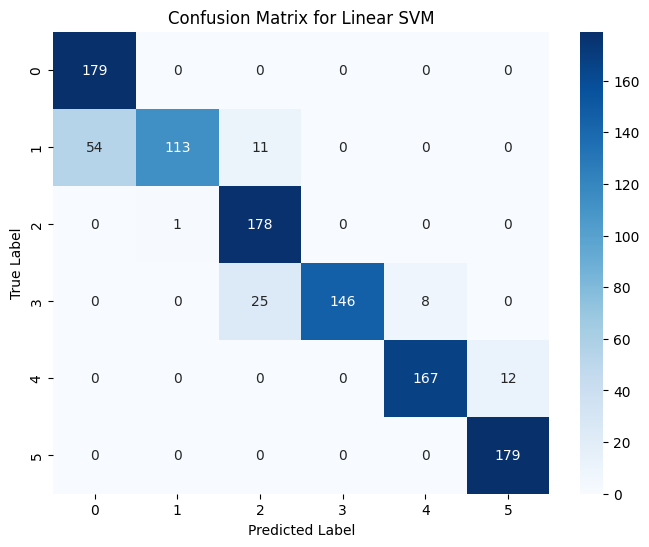


--- SVM with Polynomial Kernel ---
Training SVM-Polynomial...
Training complete.

Accuracy (Polynomial SVM): 0.9404
Classification Report (Polynomial SVM):
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       179
           1       0.95      0.79      0.86       178
           2       0.92      0.93      0.92       179
           3       0.97      0.94      0.96       179
           4       0.99      0.98      0.98       179
           5       0.99      1.00      0.99       179

    accuracy                           0.94      1073
   macro avg       0.94      0.94      0.94      1073
weighted avg       0.94      0.94      0.94      1073



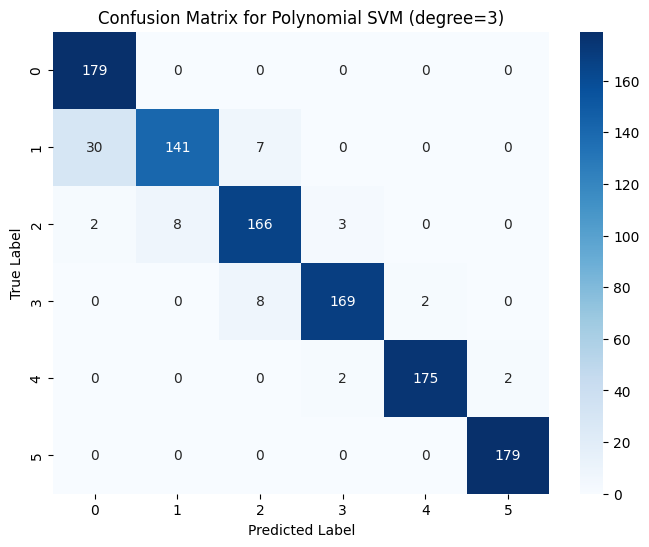


--- SVM with RBF Kernel ---
Training SVM-RBF...
Training complete.

Accuracy (RBF SVM): 0.9245
Classification Report (RBF SVM):
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       179
           1       0.98      0.72      0.83       178
           2       0.89      0.98      0.94       179
           3       1.00      0.89      0.94       179
           4       0.97      0.95      0.96       179
           5       0.95      1.00      0.98       179

    accuracy                           0.92      1073
   macro avg       0.93      0.92      0.92      1073
weighted avg       0.93      0.92      0.92      1073



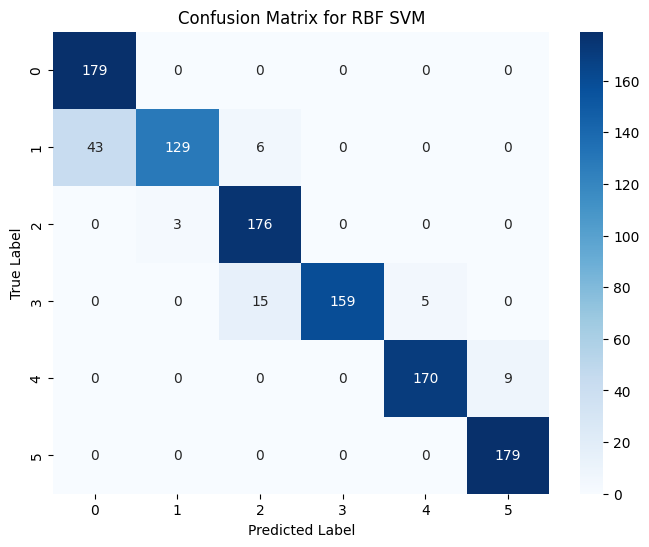


--- Model Comparison ---
            Model  Accuracy  Weighted Avg F1-Score  Macro Avg F1-Score
0      Linear SVM  0.896552               0.893159            0.893048
1  Polynomial SVM  0.940354               0.939681            0.939609
2         RBF SVM  0.924511               0.923077            0.922992

--- Summary Notes ---
The table above summarizes the performance of the three SVM kernels on the test set.
Key considerations:
1. Default Hyperparameters: These models were trained using default or common starting hyperparameters (e.g., C=1.0, degree=3 for poly, gamma='scale').
2. Performance: Check which model yielded the best accuracy and F1-scores for your specific problem. The 'best' model can depend on whether you prioritize overall accuracy, or performance on specific classes (check precision/recall in the individual reports).
3. Hyperparameter Tuning: For potentially better performance, each of these models should be tuned using techniques like GridSearchCV or RandomizedSea

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ✅ HELPER: Define a function to plot confusion matrix for better visualization
def plot_confusion_matrix(y_true, y_pred, model_name, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()



class_names = sorted(np.unique(y_test))


# To store results for comparison
results = {}

# ---
## ⚙️ 1. SVM with Linear Kernel
# ---
print("\n--- SVM with Linear Kernel ---")
# Initialize SVM with a linear kernel
# C is the regularization parameter. Default is 1.0.
# random_state is for reproducibility.
model_linear = SVC(kernel='linear', C=1.0, random_state=42, probability=True) # probability=True for roc_auc if needed later

# Train the model
print("Training SVM-Linear...")
model_linear.fit(X_train, y_train)
print("Training complete.")

# Make predictions on the test set
y_pred_linear = model_linear.predict(X_test)

# Evaluate the model
accuracy_linear = accuracy_score(y_test, y_pred_linear)
report_linear = classification_report(y_test, y_pred_linear, target_names=[str(cn) for cn in class_names]) # Ensure class_names are strings for report
# report_linear_dict = classification_report(y_test, y_pred_linear, output_dict=True) # Use this if you want to extract specific values programmatically

print(f"\nAccuracy (Linear SVM): {accuracy_linear:.4f}")
print("Classification Report (Linear SVM):")
print(report_linear)
plot_confusion_matrix(y_test, y_pred_linear, "Linear SVM", class_names)

results['Linear SVM'] = {'Accuracy': accuracy_linear,
                         'Report': classification_report(y_test, y_pred_linear, output_dict=True)}


# ---
## ⚙️ 2. SVM with Polynomial Kernel
# ---
print("\n--- SVM with Polynomial Kernel ---")
# Initialize SVM with a polynomial kernel
# degree: Degree of the polynomial kernel function. Default is 3.
# gamma: Kernel coefficient. 'scale' uses 1 / (n_features * X.var()). 'auto' uses 1 / n_features.
# C: Regularization parameter.
model_poly = SVC(kernel='poly', degree=3, gamma='scale', C=1.0, random_state=42, probability=True)

# Train the model
print("Training SVM-Polynomial...")
model_poly.fit(X_train, y_train)
print("Training complete.")

# Make predictions on the test set
y_pred_poly = model_poly.predict(X_test)

# Evaluate the model
accuracy_poly = accuracy_score(y_test, y_pred_poly)
report_poly = classification_report(y_test, y_pred_poly, target_names=[str(cn) for cn in class_names])

print(f"\nAccuracy (Polynomial SVM): {accuracy_poly:.4f}")
print("Classification Report (Polynomial SVM):")
print(report_poly)
plot_confusion_matrix(y_test, y_pred_poly, "Polynomial SVM (degree=3)", class_names)

results['Polynomial SVM'] = {'Accuracy': accuracy_poly,
                             'Report': classification_report(y_test, y_pred_poly, output_dict=True)}


# ---
## ⚙️ 3. SVM with RBF (Radial Basis Function) Kernel
# ---
print("\n--- SVM with RBF Kernel ---")
# Initialize SVM with an RBF kernel
# gamma: Kernel coefficient. 'scale' is a good default.
# C: Regularization parameter.
model_rbf = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42, probability=True)

# Train the model
print("Training SVM-RBF...")
model_rbf.fit(X_train, y_train)
print("Training complete.")

# Make predictions on the test set
y_pred_rbf = model_rbf.predict(X_test)

# Evaluate the model
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
report_rbf = classification_report(y_test, y_pred_rbf, target_names=[str(cn) for cn in class_names])

print(f"\nAccuracy (RBF SVM): {accuracy_rbf:.4f}")
print("Classification Report (RBF SVM):")
print(report_rbf)
plot_confusion_matrix(y_test, y_pred_rbf, "RBF SVM", class_names)

results['RBF SVM'] = {'Accuracy': accuracy_rbf,
                      'Report': classification_report(y_test, y_pred_rbf, output_dict=True)}

# ---
## 📊 4. Comparison of Model Results
# ---
print("\n--- Model Comparison ---")

comparison_data = []
for model_name, metrics in results.items():
    comparison_data.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Weighted Avg F1-Score': metrics['Report']['weighted avg']['f1-score'],
        'Macro Avg F1-Score': metrics['Report']['macro avg']['f1-score']
    })

df_comparison = pd.DataFrame(comparison_data)
print(df_comparison.to_string()) # .to_string() for better console output if many classes

# ---
## 📝 Summary Notes
# ---
print("\n--- Summary Notes ---")
print("The table above summarizes the performance of the three SVM kernels on the test set.")
print("Key considerations:")
print("1. Default Hyperparameters: These models were trained using default or common starting hyperparameters (e.g., C=1.0, degree=3 for poly, gamma='scale').")
print("2. Performance: Check which model yielded the best accuracy and F1-scores for your specific problem. The 'best' model can depend on whether you prioritize overall accuracy, or performance on specific classes (check precision/recall in the individual reports).")
print("3. Hyperparameter Tuning: For potentially better performance, each of these models should be tuned using techniques like GridSearchCV or RandomizedSearchCV with cross-validation on your validation set (X_val, y_val). Important hyperparameters to tune include 'C' for all kernels, 'gamma' for RBF and Polynomial, and 'degree' for Polynomial.")
print("4. Data Characteristics: The 'linear' kernel is often good for linearly separable data or when the number of features is very large. 'RBF' is generally a good first choice for non-linear data. 'Polynomial' can also model non-linearity but can be more sensitive to hyperparameter choices and computationally intensive with high degrees.")


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

class LinearSVM:
    def __init__(self, C=1.0, lr=0.001, epochs=1000):
        self.C = C
        self.lr = lr
        self.epochs = epochs
        self.W = None  # weight matrix
        self.b = None  # bias term

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)
        self.b = 0

        for epoch in range(self.epochs):
            for i in range(n_samples):
                condition = y[i] * (np.dot(X.iloc[i], self.W) + self.b) >= 1
                if condition:
                    self.W -= self.lr * (2 * self.W)
                else:
                    self.W -= self.lr * (2 * self.W - self.C * y[i] * X.iloc[i])
                    self.b += self.lr * self.C * y[i]

    def decision_function(self, X):
        return np.dot(X, self.W) + self.b

    def predict(self, X):
        return np.sign(self.decision_function(X))


In [ ]:
class OvRLinearSVM:
    def __init__(self, C=1.0, lr=0.001, epochs=10):
        self.C = C
        self.lr = lr
        self.epochs = epochs
        self.classifiers = []

    def fit(self, X, y):
        self.classes = np.unique(y)
        for cls in self.classes:
            print(f"Training classifier for class {cls}...")
            y_binary = np.where(y == cls, 1, -1)
            clf = LinearSVM(C=self.C, lr=self.lr, epochs=self.epochs)
            clf.fit(X, y_binary)
            self.classifiers.append(clf)

    def predict(self, X):
        decisions = np.array([clf.decision_function(X) for clf in self.classifiers])
        return np.argmax(decisions, axis=0)



In [ ]:
# Assuming you already have: X_train, y_train, X_test, y_test

# Initialize and train the OvR Linear SVM
svm = OvRLinearSVM(C=1.0, lr=0.001, epochs=10)

svm.fit(X_train, y_train)

# Predict on test data
y_pred = svm.predict(X_test)

# Evaluation using sklearn
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("accuracy:")
print(accuracy_score(y_test, y_pred))


Training classifier for class 0...
Training classifier for class 1...
Training classifier for class 2...
Training classifier for class 3...
Training classifier for class 4...
Training classifier for class 5...
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.09      0.17       179
           1       0.00      0.00      0.00       178
           2       0.22      1.00      0.36       179
           3       0.00      0.00      0.00       179
           4       1.00      0.08      0.15       179
           5       0.77      1.00      0.87       179

    accuracy                           0.36      1073
   macro avg       0.49      0.36      0.26      1073
weighted avg       0.49      0.36      0.26      1073

Confusion Matrix:
[[ 17   0 162   0   0   0]
 [  1   0 177   0   0   0]
 [  0   0 179   0   0   0]
 [  0   0 179   0   0   0]
 [  0   0 110   0  15  54]
 [  0   0   0   0   0 179]]
accuracy:
0.3634669151910531


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np

class PolynomialSVM:
    def __init__(self, C=1.0, lr=0.001, epochs=1000, degree=3, gamma='scale', coef0=1):
        self.C = C
        self.lr = lr
        self.epochs = epochs
        self.degree = degree
        self.gamma = gamma
        self.coef0 = coef0

    def _compute_gamma(self, X):
        if self.gamma == 'scale':
            return 1 / (X.shape[1] * np.var(X))
        elif self.gamma == 'auto':
            return 1 / X.shape[1]
        else:
            return float(self.gamma)

    def _polynomial_kernel(self, X1, X2):
      X1 = np.array(X1)
      X2 = np.array(X2)
      if X2.ndim == 1:
        X2 = np.array(X2).reshape(1, -1)
      return (self.gamma * np.dot(X1, X2.T) + self.coef0) ** self.degree

    def fit(self, X, y):
        n_samples = X.shape[0]
        self.gamma = self._compute_gamma(X)
        self.X_train = X
        self.y_train = y
        self.alpha = np.zeros(n_samples)

        # SGD on dual form approximation (simplified)
        for epoch in range(self.epochs):
            for i in range(n_samples):
                xi = X.iloc[i]
                yi = y[i]
                prediction = np.sum(
                    self.alpha * self.y_train * self._polynomial_kernel(self.X_train, xi)
                )
                condition = yi * prediction < 1
                if condition:
                    self.alpha[i] += self.lr * (1 - yi * prediction)
                    self.alpha[i] = min(max(self.alpha[i], 0), self.C)

    def project(self, X):
        K = self._polynomial_kernel(X, self.X_train)
        return np.dot(K, self.alpha * self.y_train)

    def decision_function(self, X):
        return self.project(X)

    def predict(self, X):
        return np.sign(self.decision_function(X))


In [ ]:
class OvRPolynomialSVM:
    def __init__(self, C=1.0, lr=0.001, epochs=1000, degree=3, gamma='scale', coef0=1):
        self.C = C
        self.lr = lr
        self.epochs = epochs
        self.degree = degree
        self.gamma = gamma
        self.coef0 = coef0
        self.classifiers = []

    def fit(self, X, y):
        self.classes = np.unique(y)
        for cls in self.classes:
            y_binary = np.where(y == cls, 1, -1)
            clf = PolynomialSVM(
                C=self.C,
                lr=self.lr,
                epochs=self.epochs,
                degree=self.degree,
                gamma=self.gamma,
                coef0=self.coef0,
            )
            clf.fit(X, y_binary)
            self.classifiers.append(clf)

    def predict(self, X):
        decisions = np.array([clf.decision_function(X) for clf in self.classifiers])
        return np.argmax(decisions, axis=0)


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

class OvRPolynomialSVM:
    def __init__(self, C=1.0, lr=0.001, epochs=1000, degree=3, gamma='scale', coef0=1.0):
        self.C = C
        self.lr = lr
        self.epochs = epochs
        self.degree = degree
        self.gamma = gamma
        self.coef0 = coef0
        self.classifiers = {}

    def _compute_gamma(self, X):
        # 'scale' mode as in sklearn
        return 1 / (X.shape[1] * X.var())

    def _polynomial_kernel(self, X1, X2):
        X1 = np.array(X1)
        X2 = np.array(X2)
        if X2.ndim == 1:
            X2 = X2.reshape(1, -1)
        return (self.gamma * np.dot(X1, X2.T) + self.coef0) ** self.degree

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.gamma = self._compute_gamma(X) if self.gamma == 'scale' else self.gamma

        self.classes = np.unique(y)
        for cls in self.classes:
            y_binary = np.where(y == cls, 1, -1)
            alpha = np.zeros(X.shape[0])
            for epoch in range(self.epochs):
                for i in range(X.shape[0]):
                    xi = X[i]
                    yi = y_binary[i]
                    kernel_result = self._polynomial_kernel(X, xi)
                    pred = np.sum(alpha * y_binary * kernel_result.flatten())
                    if yi * pred < 1:
                        alpha[i] += self.lr * (1 - yi * pred)
            self.classifiers[cls] = alpha, y_binary.copy(), X.copy()

    def predict(self, X):
        X = np.array(X)
        preds = []

        for xi in X:
            scores = []
            for cls in self.classes:
                alpha, y_train_bin, X_train = self.classifiers[cls]
                k = self._polynomial_kernel(X_train, xi)
                score = np.sum(alpha * y_train_bin * k.flatten())
                scores.append(score)
            preds.append(np.argmax(scores))
        return np.array(preds)



In [ ]:
# Reset indices to avoid KeyError
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Train and predict
svm_poly = OvRPolynomialSVM(C=1.0, lr=0.001, epochs=10, degree=3, gamma='scale')
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred_poly, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_poly))


              precision    recall  f1-score   support

           0       0.76      1.00      0.87       179
           1       0.87      0.54      0.67       178
           2       0.80      0.60      0.68       179
           3       0.69      0.91      0.78       179
           4       0.90      0.88      0.89       179
           5       0.97      0.99      0.98       179

    accuracy                           0.82      1073
   macro avg       0.83      0.82      0.81      1073
weighted avg       0.83      0.82      0.81      1073

Confusion Matrix:
[[179   0   0   0   0   0]
 [ 55  96  27   0   0   0]
 [  0  14 107  58   0   0]
 [  0   0   0 162  17   0]
 [  0   0   0  16 157   6]
 [  0   0   0   0   1 178]]


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

class OvRRBFSVM:
    def __init__(self, C=1.0, lr=0.001, epochs=1000, gamma='scale'):
        self.C = C
        self.lr = lr
        self.epochs = epochs
        self.gamma = gamma
        self.classifiers = {}

    def _compute_gamma(self, X):
        return 1 / (X.shape[1] * X.var())

    def _rbf_kernel(self, X1, X2):
        X1 = np.array(X1)
        X2 = np.array(X2)
        if X2.ndim == 1:
            X2 = X2.reshape(1, -1)
        dist = np.sum((X1[:, np.newaxis] - X2) ** 2, axis=2)
        return np.exp(-self.gamma * dist)

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.gamma = self._compute_gamma(X) if self.gamma == 'scale' else self.gamma

        self.classes = np.unique(y)
        for cls in self.classes:
            y_binary = np.where(y == cls, 1, -1)
            alpha = np.zeros(X.shape[0])
            for epoch in range(self.epochs):
                for i in range(X.shape[0]):
                    xi = X[i].reshape(1, -1)
                    k = self._rbf_kernel(X, xi).flatten()
                    pred = np.sum(alpha * y_binary * k)
                    if y_binary[i] * pred < 1:
                        alpha[i] += self.lr * (1 - y_binary[i] * pred)
            self.classifiers[cls] = alpha, y_binary.copy(), X.copy()

    def predict(self, X):
        X = np.array(X)
        preds = []

        for xi in X:
            scores = []
            for cls in self.classes:
                alpha, y_train_bin, X_train = self.classifiers[cls]
                k = self._rbf_kernel(X_train, xi.reshape(1, -1)).flatten()
                score = np.sum(alpha * y_train_bin * k)
                scores.append(score)
            preds.append(np.argmax(scores))
        return np.array(preds)


In [ ]:
# Reset index (to avoid KeyErrors like before)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Train and predict
svm_rbf = OvRRBFSVM(C=1.0, lr=0.001, epochs=10, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred_rbf, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rbf))


              precision    recall  f1-score   support

           0       0.54      0.88      0.67       179
           1       0.44      0.24      0.31       178
           2       0.75      0.60      0.67       179
           3       0.94      0.84      0.89       179
           4       0.86      0.89      0.88       179
           5       0.91      0.99      0.95       179

    accuracy                           0.74      1073
   macro avg       0.74      0.74      0.73      1073
weighted avg       0.74      0.74      0.73      1073

Confusion Matrix:
[[157  22   0   0   0   0]
 [101  43  34   0   0   0]
 [ 33  30 108   8   0   0]
 [  1   3   2 150  23   0]
 [  0   0   0   1 160  18]
 [  0   0   0   0   2 177]]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Grid Search for Linear SVM
param_grid_linear = {'C': [0.01, 0.1, 1, 10, 100]}
grid_linear = GridSearchCV(SVC(kernel='linear'), param_grid_linear, cv=5, scoring='accuracy', n_jobs=-1)
grid_linear.fit(X_train, y_train)

print("✅ Best Linear SVM Params (Grid Search):", grid_linear.best_params_)
print("📊 Validation Accuracy:", grid_linear.score(X_val, y_val))




In [ ]:
# Grid Search for RBF SVM
param_grid_rbf = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale']
}
grid_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rbf.fit(X_train, y_train)

print("✅ Best RBF SVM Params (Grid Search):", grid_rbf.best_params_)
print("📊 Validation Accuracy:", grid_rbf.score(X_val, y_val))


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.svm import SVC

# Define parameter distribution for Linear SVM
param_dist_linear = {
    'C': uniform(0.01, 100)  # Search over C from 0.01 to 100
}

random_search_linear = RandomizedSearchCV(
    SVC(kernel='linear'),
    param_distributions=param_dist_linear,
    n_iter=30,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_search_linear.fit(X_train, y_train)

print("🎯 Best Linear SVM Params (Random Search):", random_search_linear.best_params_)
print("📊 Validation Accuracy:", random_search_linear.score(X_val, y_val))



🎯 Best Linear SVM Params (Random Search): {'C': np.float64(61.195289472237945)}
📊 Validation Accuracy: 0.9683131407269339


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define parameter distribution for Random Search
param_dist_rbf = {
    'C': uniform(0.01, 100),         # Range from 0.01 to 100
    'gamma': uniform(0.0001, 1)      # Range from 0.0001 to 1.0001
}

random_search_rbf = RandomizedSearchCV(
    SVC(kernel='rbf'),
    param_distributions=param_dist_rbf,
    n_iter=30,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_search_rbf.fit(X_train, y_train)

print("🎯 Best RBF SVM Params (Random Search):", random_search_rbf.best_params_)
print("📊 Validation Accuracy:", random_search_rbf.score(X_val, y_val))



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Best parameters from Grid and Random Search
best_params_linear_grid = {'C': 100}
best_params_linear_random = {'C': 61.19}

best_params_rbf_grid = {'C': 100, 'gamma': 'scale'}
best_params_rbf_random = {'C': 93.95, 'gamma': 0.89}

# Linear SVM from Grid Search
linear_grid = SVC(kernel='linear', **best_params_linear_grid)
linear_grid.fit(X_train, y_train)
y_pred_lg = linear_grid.predict(X_test)
print("📈 Linear SVM (Grid Search)")
print(classification_report(y_test, y_pred_lg))
print(confusion_matrix(y_test, y_pred_lg))

# Linear SVM from Random Search
linear_random = SVC(kernel='linear', **best_params_linear_random)
linear_random.fit(X_train, y_train)
y_pred_lr = linear_random.predict(X_test)
print("\n📈 Linear SVM (Random Search)")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

# RBF SVM from Grid Search
rbf_grid = SVC(kernel='rbf', **best_params_rbf_grid)
rbf_grid.fit(X_train, y_train)
y_pred_rg = rbf_grid.predict(X_test)
print("\n📈 RBF SVM (Grid Search)")
print(classification_report(y_test, y_pred_rg))
print(confusion_matrix(y_test, y_pred_rg))

# RBF SVM from Random Search
rbf_random = SVC(kernel='rbf', **best_params_rbf_random)
rbf_random.fit(X_train, y_train)
y_pred_rr = rbf_random.predict(X_test)
print("\n📈 RBF SVM (Random Search)")
print(classification_report(y_test, y_pred_rr))
print(confusion_matrix(y_test, y_pred_rr))


In [ ]:
#خواندن دیتاست و تحلیل اولیه
# Step 1: Install gdown if it's not already installed
!pip install -q gdown

# Step 2: Download the file using its Google Drive ID
file_id = '1-5LJq2Gcr-ztqbNTYkLXj8pPQuRlAfu8'
output = 'PRSA_data_2010.1.1-2014.12.31.csv'
!gdown --id {file_id} -O {output}

# Step 3: Load the CSV into a pandas DataFrame
import pandas as pd

df2 = pd.read_csv(output)

# Step 4: Display basic info
print("✅ Dataset Loaded Successfully!")
print(df2.head())
print(df2.info())


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-5LJq2Gcr-ztqbNTYkLXj8pPQuRlAfu8
To: /content/PRSA_data_2010.1.1-2014.12.31.csv
100% 2.01M/2.01M [00:00<00:00, 174MB/s]
✅ Dataset Loaded Successfully!
   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #  

In [ ]:
# ✅ Create a datetime column from year, month, day, hour
df2['datetime'] = pd.to_datetime(df2[['year', 'month', 'day', 'hour']])

# ✅ Set datetime as index (required for time-based interpolation)
df2.set_index('datetime', inplace=True)

# ✅ Interpolate missing pm2.5 values based on time and fill edge NaNs
df2['pm2.5_interpolated'] = df2['pm2.5'].interpolate(method='time').bfill()

# ✅ Check results
print("Before interpolation:", df2['pm2.5'].isnull().sum())
print("After interpolation:", df2['pm2.5_interpolated'].isnull().sum())
df2.head()

In [ ]:
# Manual label encoding
cbwd_map = {
    'cv': 0,
    'NW': 1,
    'NE': 2,
    'SE': 3
}

# Create a new column with numerical encoding
df2['cbwd_encoded'] = df2['cbwd'].map(cbwd_map)

# Preview
df2[['cbwd', 'cbwd_encoded']].head(30)

In [ ]:
import pandas as pd

# Sample: your original DataFrame
# df2 = pd.read_csv('your_data.csv')  # if needed to load

# List of columns to process
columns_to_clean = ['pm2.5_interpolated', 'Iws', 'DEWP', 'TEMP']

# Dictionary to store counts of removed rows per column
outlier_counts = {}

# Create a copy of the original df
df2_clean = df2.copy()

for col in columns_to_clean:
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    is_outlier = (df2_clean[col] < lower_bound) | (df2_clean[col] > upper_bound)
    outlier_count = is_outlier.sum()
    outlier_counts[col] = outlier_count

    # Remove outliers for this column
    df2_clean = df2_clean[~is_outlier]

# Display results
print("Original shape:", df2.shape)
print("Cleaned shape after removing all outliers:", df2_clean.shape)
print("\nOutliers removed per column:")
for col, count in outlier_counts.items():
    print(f"{col}: {count} rows removed")


Original shape: (43824, 15)
Cleaned shape after removing all outliers: (36848, 15)

Outliers removed per column:
pm2.5_interpolated: 1884 rows removed
Iws: 5092 rows removed
DEWP: 0 rows removed
TEMP: 0 rows removed


In [ ]:
# 📌 Keep only selected columns in df2
import pandas as pd

# If not already loaded, load your dataset here
# df2 = pd.read_csv('your_dataset.csv')  # Uncomment and modify if needed

# ✅ Specify the columns to keep
selected_columns = ['pm2.5_interpolated', 'TEMP', 'DEWP', 'Iws']

# ✅ Keep only these columns
df2_filtered = df2_clean[selected_columns]

# 🖨️ Display the first few rows to verify
print("✅ Filtered DataFrame:")
print(df2_filtered.head())


✅ Filtered DataFrame:
                     pm2.5_interpolated  TEMP  DEWP    Iws
datetime                                                  
2010-01-01 00:00:00               129.0 -11.0   -21   1.79
2010-01-01 01:00:00               129.0 -12.0   -21   4.92
2010-01-01 02:00:00               129.0 -11.0   -21   6.71
2010-01-01 03:00:00               129.0 -14.0   -21   9.84
2010-01-01 04:00:00               129.0 -12.0   -20  12.97


In [ ]:
from google.colab import files

# Save the DataFrame as a CSV file
df2_filtered.to_csv('df2_filtered.csv', index=False)

# Download the file
files.download('df2_filtered.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-58-c36f0704eca5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['bin'] = kmeans.fit_predict(target)


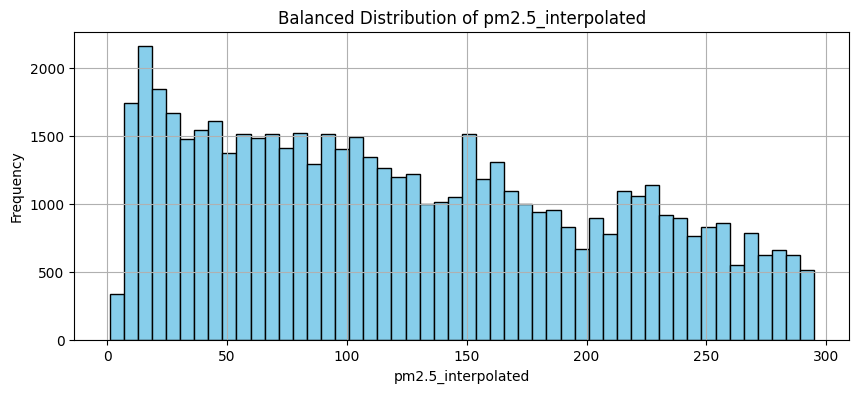

,pm2.5_interpolated,TEMP,DEWP,Iws
0,219.0,0.0,-2,1.78
1,120.0,0.0,-13,0.89
2,18.0,16.0,12,0.89
3,256.0,1.0,-4,1.78
4,143.0,20.0,18,3.13


In [ ]:
# ✅ Colab-ready code to balance regression data using KMeans + oversampling

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Step 2: Apply KMeans clustering to create bins on the target column
target = df2_filtered['pm2.5_interpolated'].values.reshape(-1, 1)

# Create 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df2_filtered['bin'] = kmeans.fit_predict(target)

# Step 3: Balance the bins using oversampling
max_bin_size = df2_filtered['bin'].value_counts().max()
df2_balanced = pd.DataFrame()

for b in df2_filtered['bin'].unique():
    bin_group = df2_filtered[df2_filtered['bin'] == b]
    if len(bin_group) < max_bin_size:
        bin_group = resample(bin_group, replace=True, n_samples=max_bin_size, random_state=42)
    df2_balanced = pd.concat([df2_balanced, bin_group])

# Step 4: Final cleanup and shuffle
df2_balanced = df2_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
df2_balanced.drop(columns='bin', inplace=True)

# Step 5: Visualize the distribution
plt.figure(figsize=(10, 4))
plt.hist(df2_balanced['pm2.5_interpolated'], bins=50, color='skyblue', edgecolor='black')
plt.title('Balanced Distribution of pm2.5_interpolated')
plt.xlabel('pm2.5_interpolated')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

df2_balanced.head()


In [ ]:
df2_balanced.head()

,pm2.5_interpolated,TEMP,DEWP,Iws
0,219.0,0.0,-2,1.78
1,120.0,0.0,-13,0.89
2,18.0,16.0,12,0.89
3,256.0,1.0,-4,1.78
4,143.0,20.0,18,3.13


In [ ]:
# 📦 Import libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# 🧾 View columns
print("Columns in the dataset:", df2_balanced.columns.tolist())

# 🎯 Set features and target
features = ['TEMP', 'DEWP', 'Iws']
target = 'pm2.5_interpolated'

# 🧪 Normalize feature columns
scaler = MinMaxScaler()
df2_balanced[features] = scaler.fit_transform(df2_balanced[features])

# Optional: Uncomment the next line if you want to normalize the target column too
df2_balanced[[target]] = scaler.fit_transform(df2_balanced[[target]])


print("✅ Normalization complete. Normalized dataset saved as df2_balanced_normalized.csv")
df2_balanced.head()

Columns in the dataset: ['pm2.5_interpolated', 'TEMP', 'DEWP', 'Iws']
✅ Normalization complete. Normalized dataset saved as df2_balanced_normalized.csv


,pm2.5_interpolated,TEMP,DEWP,Iws
0,0.741497,0.300000,0.531250,0.025860
1,0.404762,0.300000,0.359375,0.008555
2,0.057823,0.566667,0.750000,0.008555
3,0.867347,0.316667,0.500000,0.025860
4,0.482993,0.633333,0.843750,0.052110


📉 Mean Squared Error (MSE): 0.060702331724629285
🧮 R² Score: 0.16504053638426086


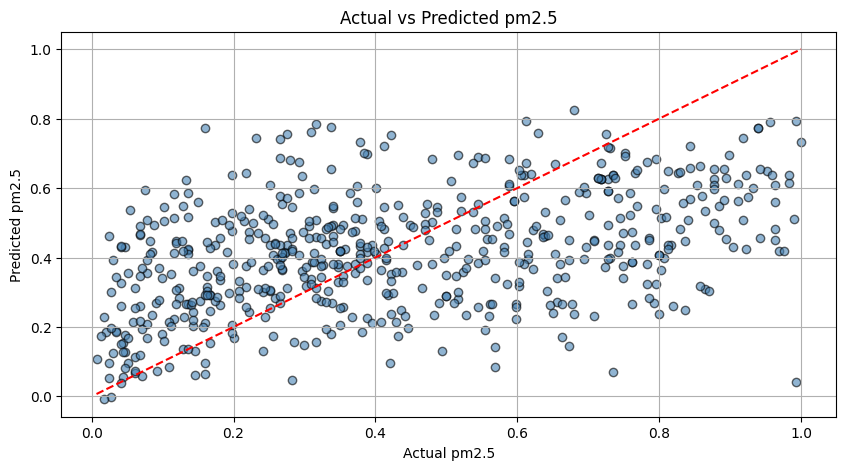

In [ ]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


df2_balanced = df2_balanced.sample(frac=0.05, random_state=42).reset_index(drop=True)

# 🎯 Define features and target
X = df2_balanced[['TEMP', 'DEWP', 'Iws']]
y = df2_balanced['pm2.5_interpolated']

# 🧪 Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ⚙️ Train SVR model (RBF kernel)
svr_model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.01)
svr_model.fit(X_train, y_train)

# 📈 Predict
y_pred = svr_model.predict(X_test)

# 📊 Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📉 Mean Squared Error (MSE):", mse)
print("🧮 R² Score:", r2)

# 📊 Plot predictions vs actual
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='steelblue', edgecolor='k', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs Predicted pm2.5')
plt.xlabel('Actual pm2.5')
plt.ylabel('Predicted pm2.5')
plt.grid(True)
plt.show()

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=466a87efa9dd896b900edf480d3a4040c7fcf522db26462b9dd5175b5dcc2269
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm
Stopping search: maximum iterations reached --> 30
🔍 Best parameters from PSO:
 C=83.7918, gamma=10.0000, epsilon=0.3852
📉 Best Validation MSE: 0.0583

📊 Test MSE: 0.0539
🧮 Test R² Score: -0.0037


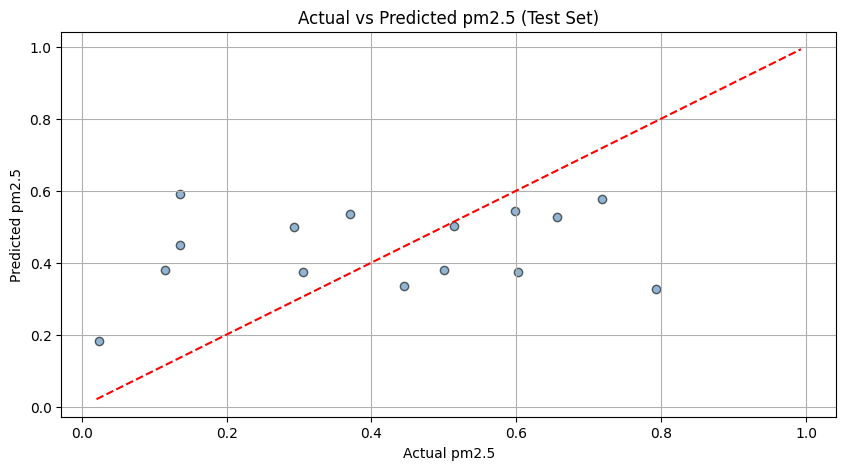

In [ ]:
# 📦 Install required library for PSO
!pip install pyswarm

# 📦 Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from pyswarm import pso
import matplotlib.pyplot as plt


# 📊 Take 5% sample of the dataset
df_sample = df2_balanced.sample(frac=0.05, random_state=42).reset_index(drop=True)

# 🎯 Define features and target
X = df_sample[['TEMP', 'DEWP', 'Iws']]
y = df_sample['pm2.5_interpolated']

# 🧪 Split into train (80%), temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧪 Split temp into validation (50% of temp = 10% of total) and test (50% of temp = 10% of total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ⚙️ Define objective function for PSO (minimize validation MSE)
def svr_pso_obj(params):
    C, gamma, epsilon = params
    model = SVR(kernel='rbf', C=C, gamma=gamma, epsilon=epsilon)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_val_pred)
    return mse

# 🎛️ Define parameter bounds: [C, gamma, epsilon]
lb = [0.1, 0.01, 0.001]   # lower bounds
ub = [100, 10, 1]           # upper bounds

# 🚀 Run PSO
best_params, best_mse = pso(svr_pso_obj, lb, ub, swarmsize=20, maxiter=30)

# 📌 Extract optimized parameters
best_C, best_gamma, best_epsilon = best_params
print(f"🔍 Best parameters from PSO:\n C={best_C:.4f}, gamma={best_gamma:.4f}, epsilon={best_epsilon:.4f}")
print(f"📉 Best Validation MSE: {best_mse:.4f}")

# ⚙️ Train final SVR model using optimized parameters
final_model = SVR(kernel='rbf', C=best_C, gamma=best_gamma, epsilon=best_epsilon)
final_model.fit(X_train, y_train)

# 📈 Predict on test set
y_pred_test = final_model.predict(X_test)

# 📊 Evaluate on test set
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"\n📊 Test MSE: {test_mse:.4f}")
print(f"🧮 Test R² Score: {test_r2:.4f}")

# 📉 Plot predictions vs actual on test set
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_test, color='steelblue', edgecolor='k', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs Predicted pm2.5 (Test Set)')
plt.xlabel('Actual pm2.5')
plt.ylabel('Predicted pm2.5')
plt.grid(True)
plt.show()
